<a href="https://colab.research.google.com/github/nikishkaaa/ML-Course/blob/main/%22HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print('Size', df.shape)
print(df.info())

Size (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
pal = sns.color_palette("Spectral")
sns.set_palette(pal)

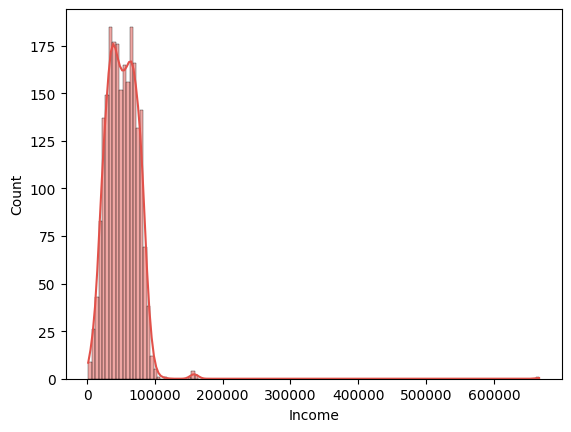

In [ ]:
sns.histplot(df['Income'], kde=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


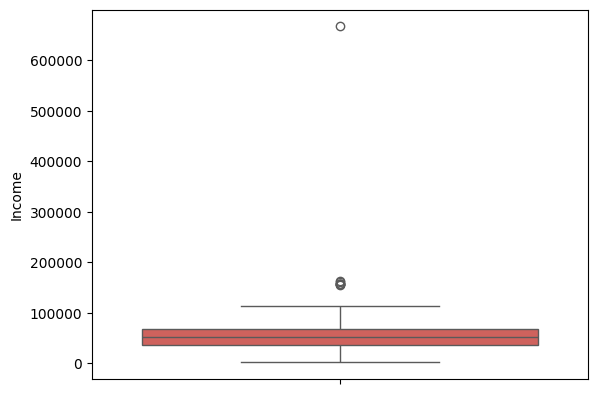

In [ ]:
sns.boxplot(df.Income)
plt.show()

In [ ]:
print("Median", df['Income'].median())
print('Mean', df['Income'].mean())

Median 51381.5
Mean 52247.25135379061


In [ ]:
df.Income.fillna(df.Income.mean(), inplace=True)

<ipython-input-10-a1677551182b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Income.fillna(df.Income.mean(), inplace=True)


Я вибрала заповнювати медіаною тому що, медіана не чутлива до викидів. У колонці Income наявні викиди. Для задачі кластерізації викиди мають значення та їх збільшення буде погіршувати роботу моделі кластерізації

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

#### Створення нових колонок за допомогою обробки колонок з датами

In [ ]:
df['Age'] = 2024 - df['Year_Birth']

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df['livetime'] = 2024 - df['Dt_Customer'].dt.year
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,livetime
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,12
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,10
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,57,11
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,78,10
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,43,10
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,68,10


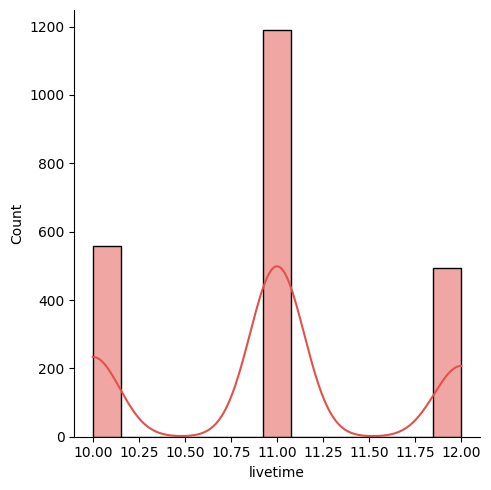

In [ ]:
sns.displot(df, x='livetime', kde=True)
plt.show()

In [ ]:
df['Total_Number_of_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['Total_Amount'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

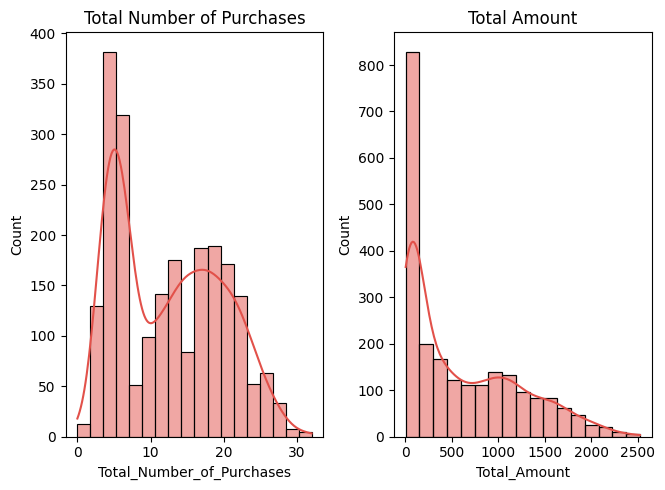

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot2grid((1, 3), (0, 0))
sns.histplot(df['Total_Number_of_Purchases'], kde=True, ax=ax1)
ax1.set_title('Total Number of Purchases')

ax2 = plt.subplot2grid((1, 3), (0, 1))
sns.histplot(df['Total_Amount'], kde=True, ax=ax2)
ax2.set_title('Total Amount')

plt.tight_layout()
plt.show()

#### Кодування категоріальних ознак

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['Education', 'Marital_Status']

In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
categories = [['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']]
encoder = OrdinalEncoder(categories=categories)

df['Education'] = encoder.fit_transform(df[['Education']])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,livetime,Total_Number_of_Purchases,Total_Amount
0,5524,1957,1.0,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,67,12,22,1617
1,2174,1954,1.0,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,70,10,4,27
2,4141,1965,1.0,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,59,11,20,776
3,6182,1984,1.0,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,40,10,6,53
4,5324,1981,4.0,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,43,10,14,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1.0,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,57,11,16,1341
2236,4001,1946,4.0,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,78,10,15,444
2237,7270,1981,1.0,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,43,10,18,1241
2238,8235,1956,3.0,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,68,10,21,843


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df_status = pd.DataFrame({'Marital_Status': df["Marital_Status"]})
model_counts = df_status['Marital_Status'].value_counts()
top_status = model_counts.head(5).index
top_status

Index(['Married', 'Together', 'Single', 'Divorced', 'Widow'], dtype='object', name='Marital_Status')

In [ ]:
df['Marital_Status_Reduced'] = df['Marital_Status'].apply(lambda x: x if x in top_status else 'Other_status')

In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(df[['Marital_Status_Reduced']])
#enc.categories_
one_hot = enc.transform(df[['Marital_Status_Reduced']]).toarray()
df[enc.categories_[0]] = one_hot

Висновок: Було створено 4 нових колонки: Total_Number_of_Purchases, Total_Amount, livetime, age. Категоріальні ознаки: Education - закодовано OriginalEncoder відповідно по порядку отримання ступеня освіти, Marital_Status - зменшено к-ть ознак та закодовано OneHotEncoder

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [ ]:
X = df.drop(['Year_Birth', 'Marital_Status', 'Dt_Customer', 'Marital_Status_Reduced', 'ID'], axis=1)

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 1 0 ... 0 0 0]


In [ ]:
silhouette_avg = silhouette_score(X, labels)
print("Для n_clusters = 3 Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Для n_clusters = 3 Середнє значення silhouette_score становить: 0.5962214336045756


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [ ]:
X_new = X[['Education', 'Income', 'NumDealsPurchases', 'Total_Number_of_Purchases', 'Total_Amount']]

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

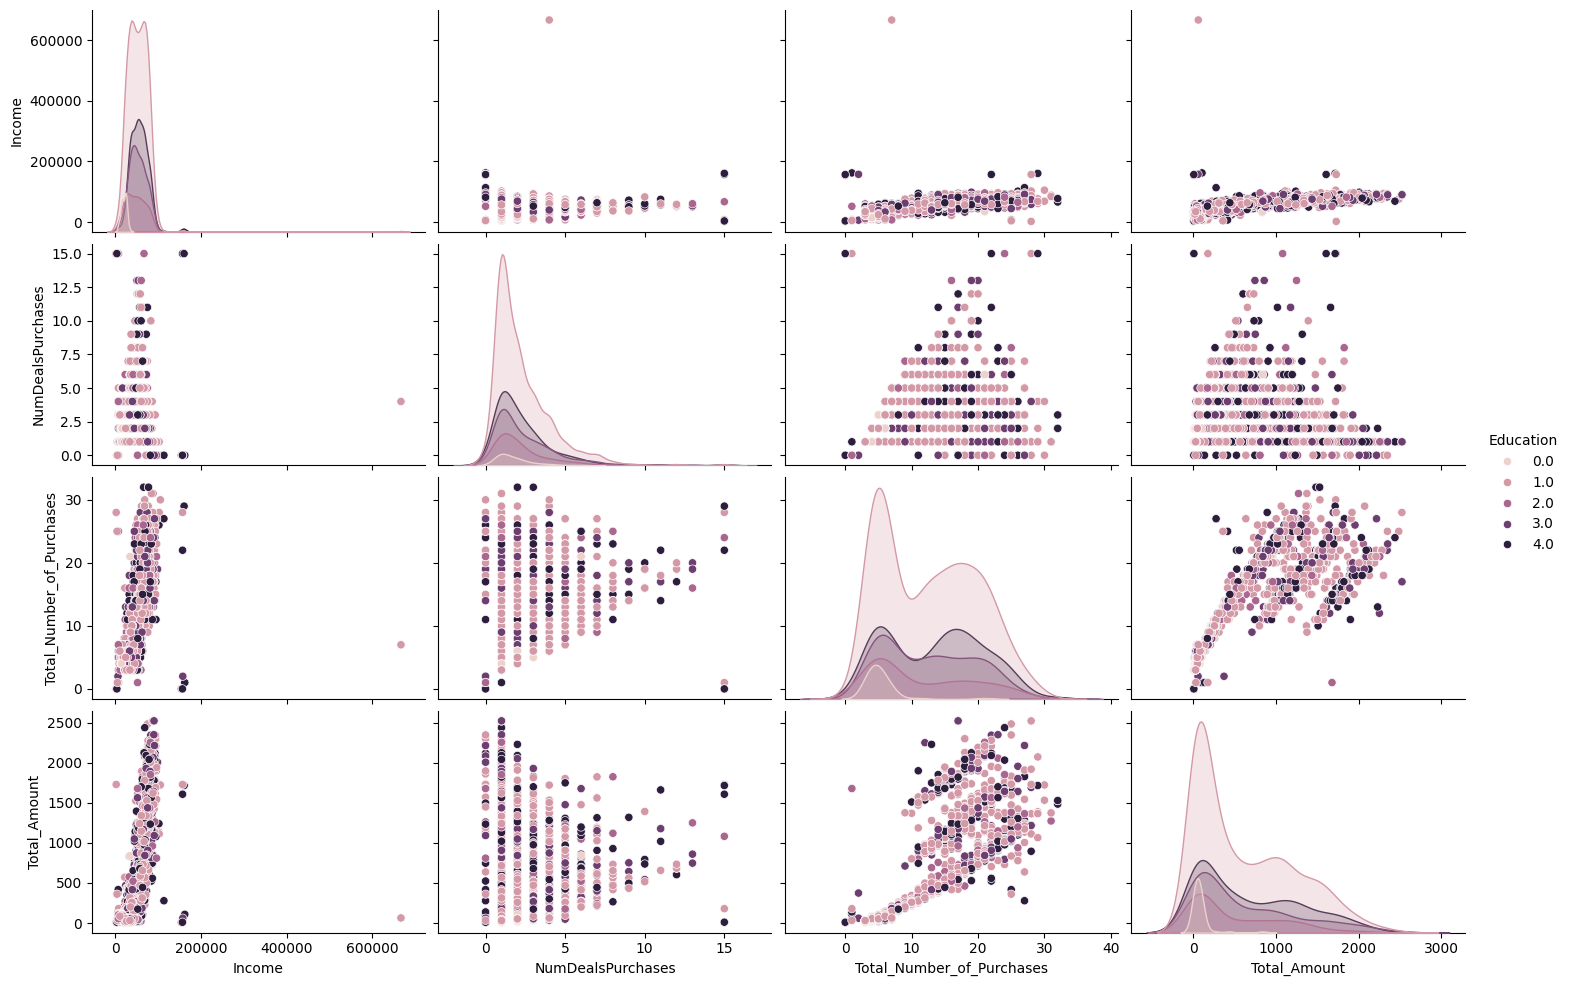

In [ ]:
sns.pairplot(X_new, hue = 'Education', aspect = 1.5)
plt.show()

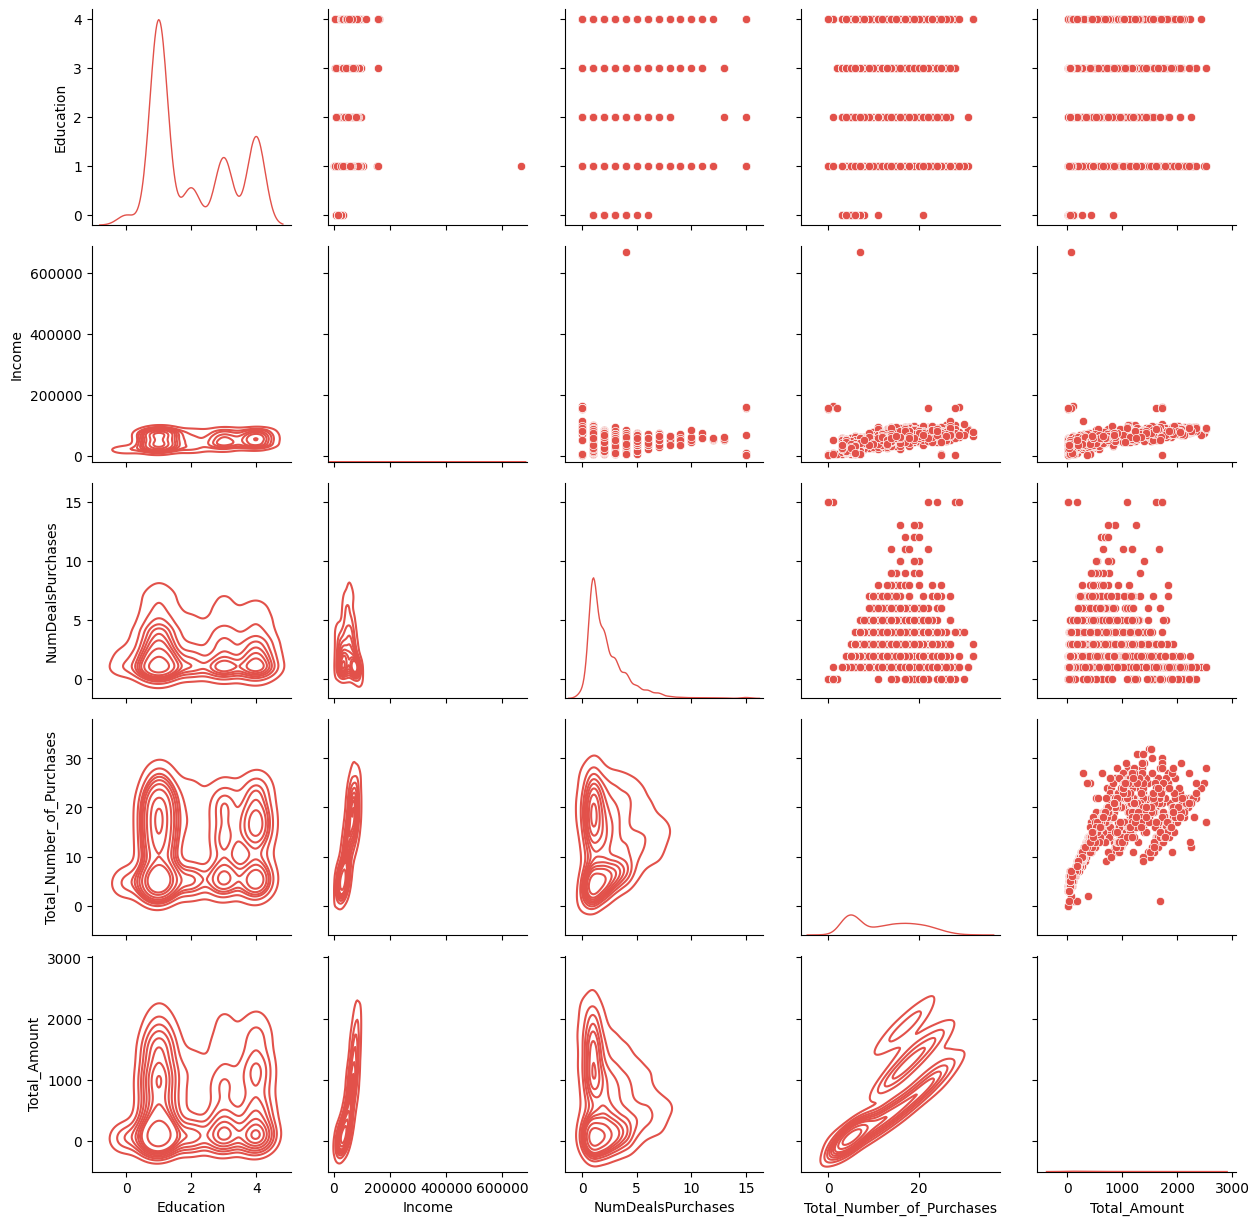

In [ ]:
graph = sns.PairGrid(X_new)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 1)
plt.show()

<ipython-input-32-e6b13de4880e>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x= X['Total_Number_of_Purchases'],y= X['Total_Amount'], hue = X['Labels'], palette = sns.color_palette("Spectral"))


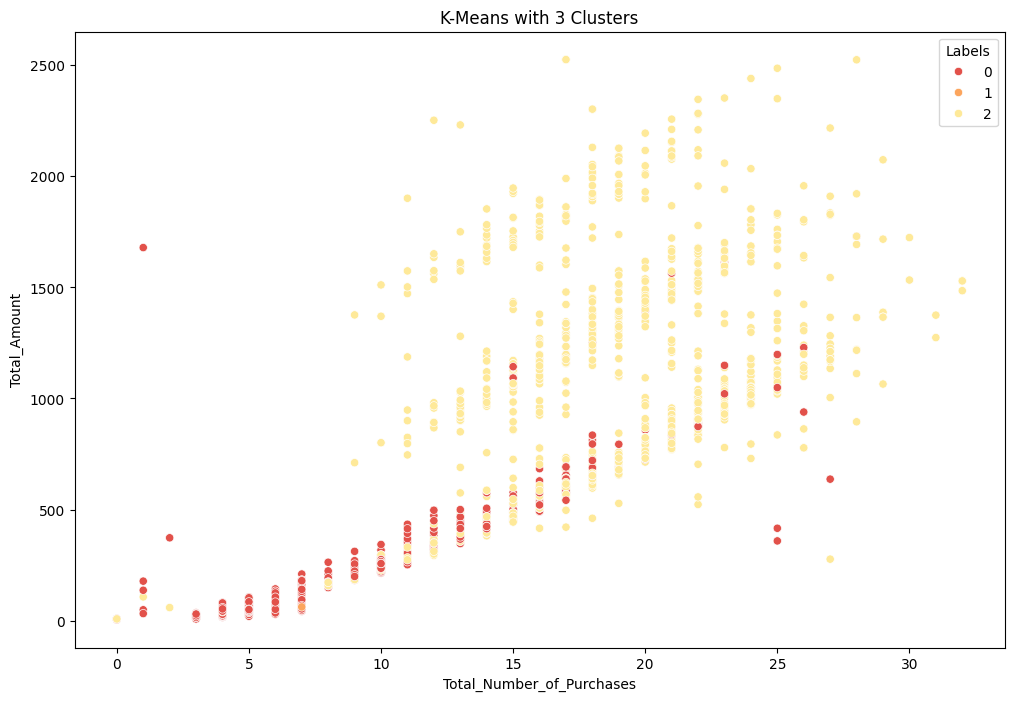

In [ ]:
km3 = KMeans(n_clusters = 3).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Total_Number_of_Purchases'],y= X['Total_Amount'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('K-Means with 3 Clusters')
plt.show()


**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = X.select_dtypes(include='number').columns
scaler = StandardScaler()
scaler.fit(X[numeric_cols])
scaled_inputs = scaler.transform(X[numeric_cols])

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(scaled_inputs)

labels = kmeans.predict(scaled_inputs)
print(labels)

[1 0 2 ... 2 2 0]


In [ ]:
silhouette_avg = silhouette_score(scaled_inputs, labels)
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.16375387630190993


Висновок: масштабування даних погіршило значення метрики

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [ ]:
def remove_outliers_iqr(df):
    df_cleaned = df.copy()

    for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

scaled_inputs_df = pd.DataFrame(scaled_inputs)
df_no_outliers = remove_outliers_iqr(scaled_inputs_df)

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df_no_outliers)
labels = kmeans.predict(df_no_outliers)
silhouette_avg = silhouette_score(df_no_outliers, labels)
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.20834664037941888


Видалення аутлаєрів для відмаштабованих даних покращило метрику сулуету

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

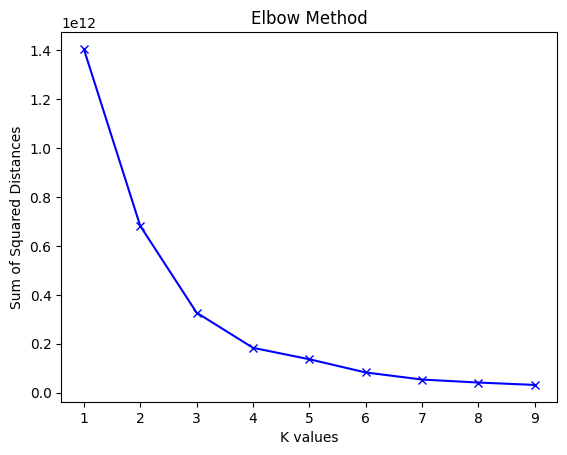

In [ ]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
labels = kmeans.predict(X)
silhouette_avg = silhouette_score(X, labels)
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.5962214345825299


<ipython-input-53-eed61e78008c>:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x= X['Total_Number_of_Purchases'],y= X['Total_Amount'], hue = X['Labs'], palette = sns.color_palette("Spectral"))


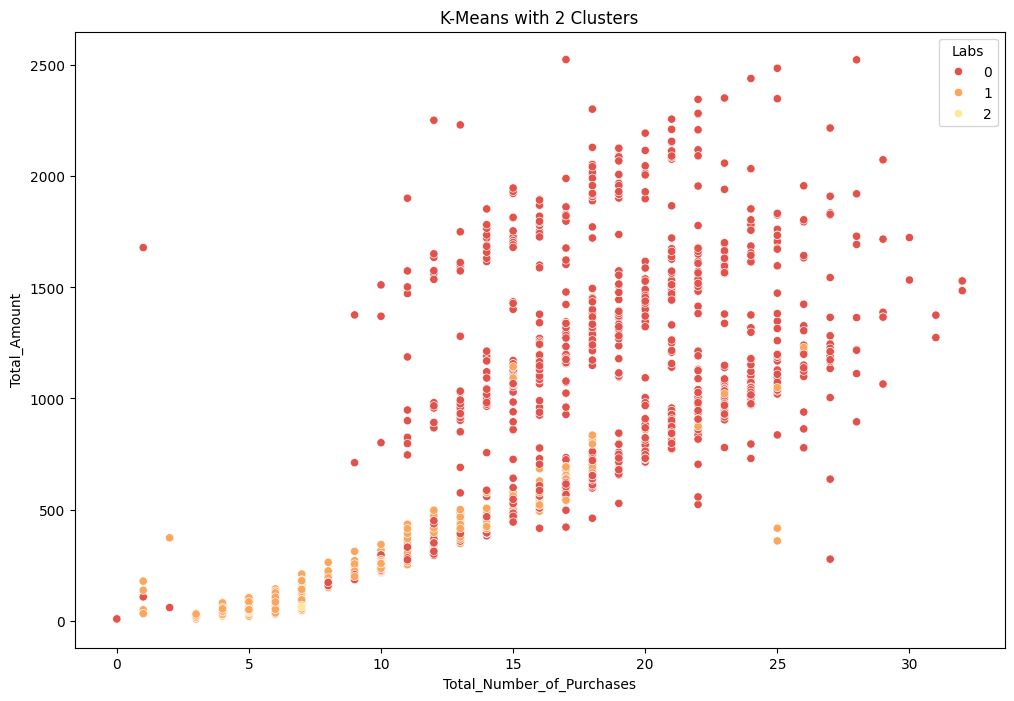

In [ ]:
X['Labs'] = kmeans.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Total_Number_of_Purchases'],y= X['Total_Amount'], hue = X['Labs'], palette = sns.color_palette("Spectral"))
plt.title('K-Means with 2 Clusters')
plt.show()

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [ ]:
X_new = remove_outliers_iqr(X)

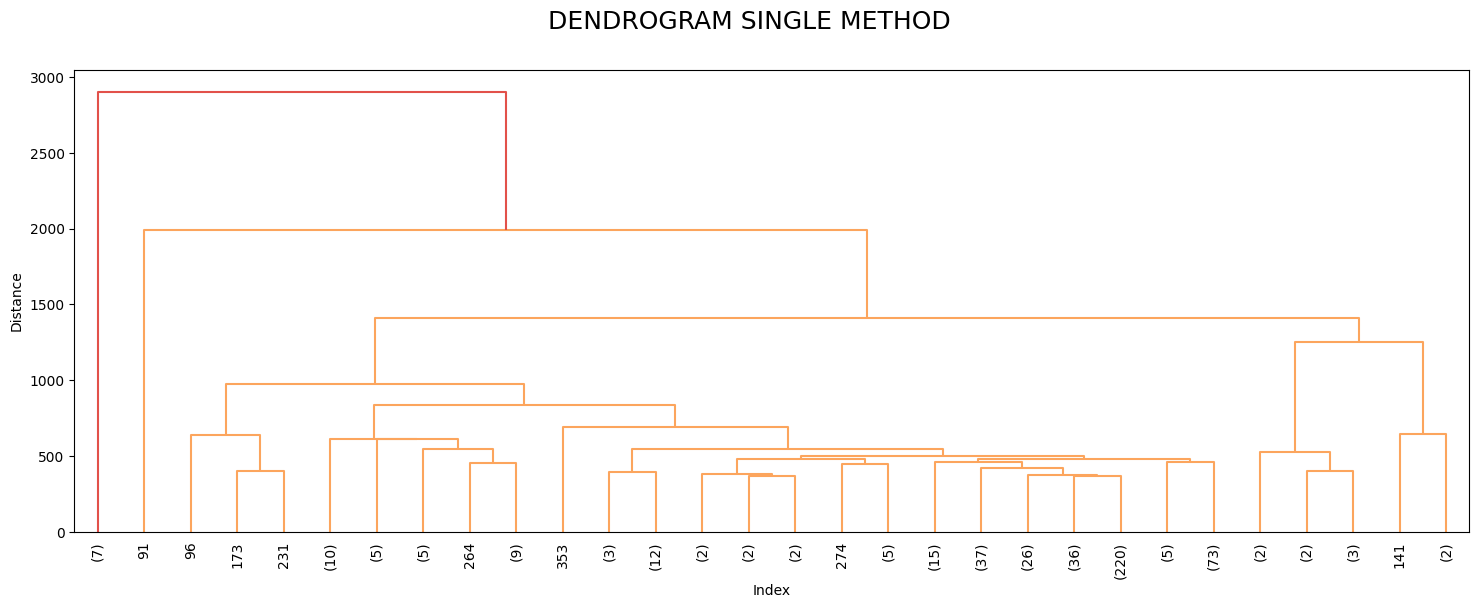

In [ ]:
dist_sin = linkage(X_new, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [ ]:
X_new['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_new['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

In [ ]:
X_new.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Divorced,Married,Other_status,Single,Together,Widow,Labels,Labs,2_clust,3_clust
3,1.0,26646.000000,1,0,26,11,4,20,10,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,2,2
7,4.0,33454.000000,1,0,32,76,10,56,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,2,2
10,1.0,52247.251354,1,0,11,5,5,6,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,2,2
11,0.0,7500.000000,0,0,59,6,16,11,11,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,1
14,1.0,17323.000000,0,0,38,3,14,17,6,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,2,2


<Axes: title={'center': 'K = 3'}, xlabel='Total_Amount', ylabel='Income'>

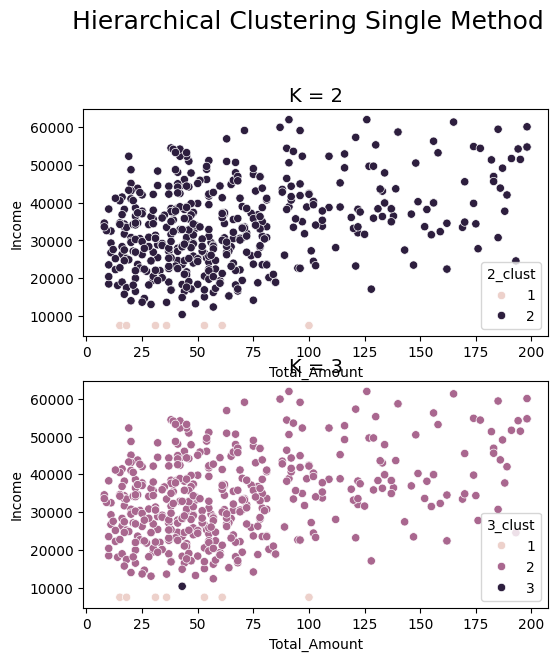

In [ ]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Total_Amount",y="Income", data=X_new, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Total_Amount",y="Income", data=X_new, hue="3_clust")


In [ ]:
silhouette_avg = silhouette_score(X_new, X_new['2_clust'])
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.4468034180697589


In [ ]:
silhouette_avg = silhouette_score(X_new, X_new['3_clust'])
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.37150182878731863


Висновок: Kmeans працює погано для цього датасету, потрібно використати інший

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [85]:
from sklearn.cluster import OPTICS
from sklearn.model_selection import GridSearchCV

In [ ]:
X_new.drop(['Labels', 'Labs', '2_clust', '3_clust'], axis=1)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Age,livetime,Total_Number_of_Purchases,Total_Amount,Divorced,Married,Other_status,Single,Together,Widow
3,1.0,26646.000000,1,0,26,11,4,20,10,3,...,40,10,6,53,0.0,0.0,0.0,0.0,1.0,0.0
7,4.0,33454.000000,1,0,32,76,10,56,3,1,...,39,11,8,169,0.0,1.0,0.0,0.0,0.0,0.0
10,1.0,52247.251354,1,0,11,5,5,6,0,2,...,41,11,3,19,0.0,1.0,0.0,0.0,0.0,0.0
11,0.0,7500.000000,0,0,59,6,16,11,11,1,...,48,12,5,61,0.0,1.0,0.0,0.0,0.0,0.0
14,1.0,17323.000000,0,0,38,3,14,17,6,1,...,37,12,4,46,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1.0,22775.000000,1,0,40,5,1,8,0,0,...,46,11,3,15,0.0,0.0,0.0,0.0,1.0,0.0
2222,2.0,7500.000000,1,0,7,2,8,11,3,8,...,45,11,7,53,0.0,0.0,0.0,0.0,1.0,0.0
2223,3.0,33562.000000,1,2,33,21,12,12,0,3,...,61,10,6,51,0.0,1.0,0.0,0.0,0.0,0.0
2229,1.0,24434.000000,2,0,9,3,2,8,20,0,...,52,10,5,50,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

In [ ]:
optics.fit(X_new)

OPTICS(min_cluster_size=0.05)

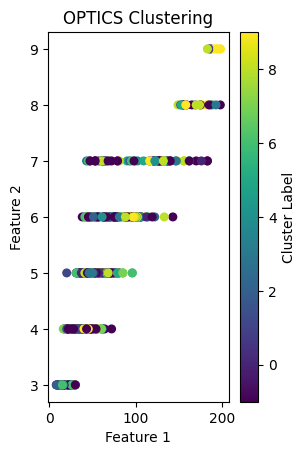

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X_new['Total_Amount'], X_new['Total_Number_of_Purchases'], c=labels, cmap='viridis', s=30)
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')